In [2]:
import random as random
import Bio
import numpy as np
import sys
import os
import networkx as nx
import random as random
from tqdm import tqdm # loading bar
from utils_copy import linear_C, get_cost_2, get_sequence_string, parse_fasta_multiple, create_score_matrix, write_alignments_to_file, linear_backtrack, fill_graph,new_sp_approxi_combi
from utils_copy import convert_to_desired_format_nr_version, compute_cost, my_traversal_simply, extend_alignment_chaos, find_min_span_edges_testing, parse_fasta_multiple_remove_n
import timeit
from utils_copy import al_integrity_testt
from old_for_testing.sp_approx import sp_approx
from old_for_testing.utils import *
from functions_multiple_version import *

score_matrix={'a': {'a': 0, 'c': 5, 'g': 2, 't': 5}, 'c': {'a': 5, 'c': 0, 'g': 5, 't': 2}, 'g': {'a': 2, 'c': 5, 'g': 0, 't': 5}, 't': {'a': 5, 'c': 2, 'g': 5, 't': 0}}
gap_cost=5



In [4]:
random_sequences_collection[7]

#acaagttta , atatcta

['tcgtgtg',
 'gcaaaggt',
 'ccccatttt',
 'ttcctccaat',
 'ttcttg',
 'taatagcggagcta',
 'gggtctc',
 'agcacgacca',
 'actgg',
 'ttcca']

In [9]:
random_sequences_collection=[]
for i in range(0,10):
    random_pile=[]
    for j in range (0,10):
        a_sequence=[]
        for k in range(0,random.randrange(5,20)):
            a_sequence.append(random.choice(['a','c','t','g']))
        a_sequence=''.join(a_sequence)
        random_pile.append(a_sequence)

    random_sequences_collection.append(random_pile)

print(random_sequences_collection)

[['aaaatatctctcggt', 'tcgct', 'taacgaatagaggccgc', 'caccgcggagctggtctgc', 'gtgttagggcg', 'agggg', 'cgactg', 'ggagt', 'acgggtaagcggataagc', 'tatgctctcgtaacc'], ['ccatag', 'tagcagt', 'cctggcacttctcc', 'aggaatgcctaaag', 'taacagcgcgt', 'caaagatca', 'ccctaactaggcg', 'cgcttcatgc', 'tatta', 'cgaaggttccgcagctt'], ['gaacgcaa', 'tgtatga', 'gatctc', 'ctacgatgttctgaagtgc', 'gcaccaac', 'gcctcaagt', 'cgttcacatggg', 'tgagaa', 'gcaagacg', 'aaaaa'], ['aaaatacaggaaggtt', 'gttcaccg', 'tgaccactat', 'gcgtcttgccatccg', 'atgcggagagtattccagc', 'cgatcgtacata', 'ggtcgagcatcaattcgc', 'cggcttgcttg', 'tggtaccttgtaacactac', 'cgcagatgtttaatgtatg'], ['agagaaatctaaatg', 'ttcatgcaga', 'tccccccgatggtaagcgc', 'tcctacgtcttg', 'cagtgata', 'agcacat', 'ctcggag', 'ggcaccgt', 'atgctgaagcatggtt', 'gttctgctgc'], ['gattatttgtagggta', 'cgtcggac', 'atatggacagacctgac', 'cagct', 'cctgacctgagggcgc', 'tcgaggccg', 'cactagt', 'tctgg', 'tggcatg', 'tggcgg'], ['atgtgcattcgca', 'gtggcatccctccg', 'catctaaacgtgtgacaac', 'tagttgatcttaaggac', 'c

Here comes the distance matrix produced by the alignments: 

[[ 0. 55. 44. 51. 46. 54. 52. 54. 45. 37.]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]
Here comes the distance matrix produced by the alignments: 

[[ 0. 55. 44. 51. 46. 54. 52. 54. 45. 37.]
 [55.  0. 62. 72. 37. 20. 14. 17. 69. 52.]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]
Here comes the d

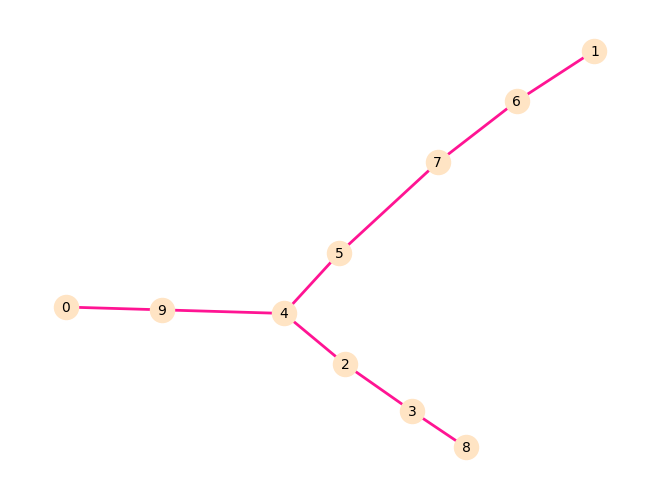

this is A_dict: 
{'1_6': [['t', 'c'], ['c', 'g'], ['g', 'a'], ['c', 'c'], ['t', 't'], ['-', 'g']], '6_7': [['c', 'g'], ['g', 'g'], ['a', 'a'], ['c', 'g'], ['t', 't'], ['g', '-']], '5_7': [['g', 'a'], ['g', 'g'], ['a', 'g'], ['g', 'g'], ['t', 'g']], '4_5': [['-', 'g'], ['-', 't'], ['-', 'g'], ['-', 't'], ['-', 't'], ['a', 'a'], ['g', 'g'], ['g', 'g'], ['g', 'g'], ['-', 'c'], ['g', 'g']], '4_9': [['-', 't'], ['g', 'a'], ['t', 't'], ['g', 'g'], ['-', 'c'], ['t', 't'], ['-', 'c'], ['t', 't'], ['a', 'c'], ['g', 'g'], ['-', 't'], ['g', 'a'], ['g', 'a'], ['c', 'c'], ['g', 'c']], '2_4': [['-', 't'], ['-', 'a'], ['g', 'a'], ['t', 'c'], ['g', 'g'], ['-', 'a'], ['t', 'a'], ['t', 't'], ['a', 'a'], ['g', 'g'], ['-', 'a'], ['g', 'g'], ['g', 'g'], ['-', 'c'], ['c', 'c'], ['g', 'g'], ['-', 'c']], '0_9': [['t', 'a'], ['a', 'a'], ['t', 'a'], ['g', 'a'], ['c', 't'], ['-', 'a'], ['t', 't'], ['c', 'c'], ['t', 't'], ['c', 'c'], ['g', 't'], ['t', 'c'], ['a', 'g'], ['a', 'g'], ['c', '-'], ['c', 't']], '2_3': 

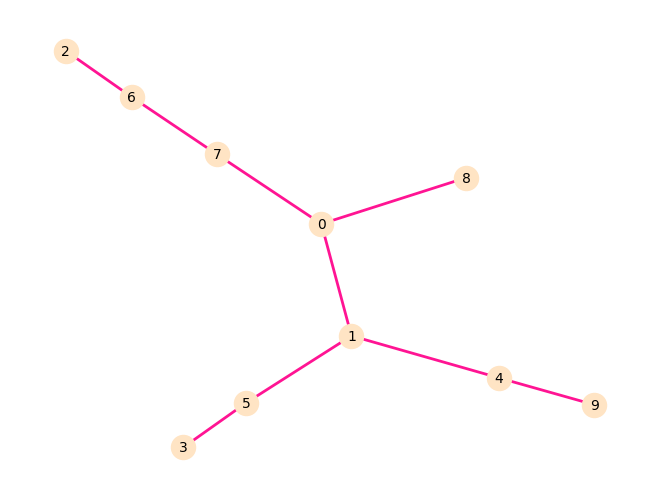

this is A_dict: 
{'0_8': [['-', 'c'], ['t', 'c'], ['a', 'a'], ['t', 't'], ['t', 'a'], ['a', 'g']], '0_1': [['c', 't'], ['c', 'a'], ['a', 'g'], ['t', 'c'], ['a', 'a'], ['g', 'g'], ['-', 't']], '0_7': [['c', 'c'], ['-', 'g'], ['c', 'c'], ['a', 't'], ['t', 't'], ['-', 'c'], ['a', 'a'], ['-', 't'], ['g', 'g'], ['-', 'c']], '1_4': [['t', 't'], ['-', 'a'], ['-', 'a'], ['-', 'c'], ['a', 'a'], ['g', 'g'], ['c', 'c'], ['a', 'g'], ['-', 'c'], ['g', 'g'], ['t', 't']], '1_5': [['t', 'c'], ['a', 'a'], ['g', 'a'], ['c', 'a'], ['a', 'g'], ['g', 'a'], ['t', 't'], ['-', 'c'], ['-', 'a']], '6_7': [['c', 'c'], ['g', 'c'], ['c', 'c'], ['t', 't'], ['-', 'a'], ['-', 'a'], ['t', 'c'], ['c', 't'], ['a', 'a'], ['t', 'g'], ['g', 'g'], ['c', 'c'], ['-', 'g']], '4_9': [['t', 'c'], ['a', 'g'], ['a', 'a'], ['c', 'a'], ['a', 'g'], ['g', 'g'], ['-', 't'], ['-', 't'], ['-', 'c'], ['c', 'c'], ['g', 'g'], ['c', 'c'], ['-', 'a'], ['g', 'g'], ['-', 'c'], ['-', 't'], ['t', 't']], '3_5': [['c', 'a'], ['a', 'g'], ['a', 'g'],

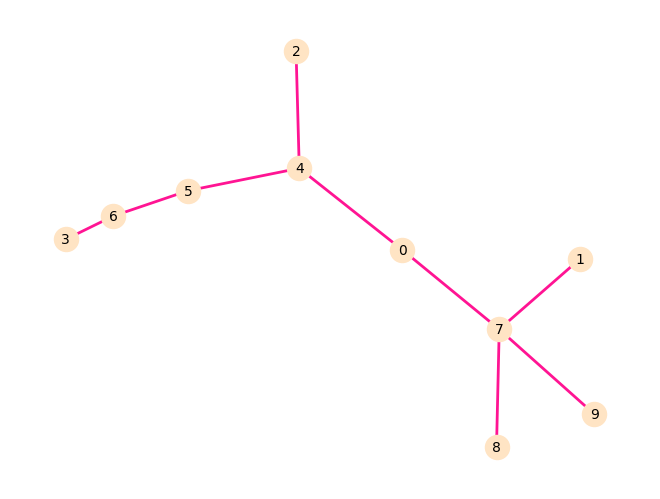

this is A_dict: 
{'3_6': [['c', '-'], ['t', '-'], ['a', '-'], ['c', 'c'], ['g', 'g'], ['a', '-'], ['t', 't'], ['g', '-'], ['t', 't'], ['t', 'c'], ['c', 'a'], ['t', 'c'], ['g', 'a'], ['a', 't'], ['a', 'g'], ['g', 'g'], ['t', '-'], ['g', 'g'], ['c', '-']], '5_6': [['c', '-'], ['g', 'g'], ['t', 'c'], ['t', 'c'], ['c', 't'], ['a', '-'], ['c', 'c'], ['a', 'a'], ['t', '-'], ['g', 'a'], ['g', 'g'], ['g', 't']], '4_5': [['g', 'g'], ['c', 'c'], ['c', 'a'], ['t', 'c'], ['c', 'c'], ['a', 'a'], ['a', 'a'], ['g', '-'], ['t', 'c']], '0_4': [['g', 'g'], ['c', 'a'], ['a', 'a'], ['c', 'c'], ['-', 'g'], ['c', 'c'], ['a', 'a'], ['a', 'a'], ['c', '-']], '2_4': [['g', 'g'], ['c', '-'], ['a', 'a'], ['c', 't'], ['c', 'c'], ['a', '-'], ['a', 't'], ['c', 'c']], '0_7': [['g', 't'], ['a', 'g'], ['a', 'a'], ['c', '-'], ['g', 'g'], ['c', '-'], ['a', 'a'], ['a', 'a']], '7_9': [['t', '-'], ['g', 'a'], ['a', 'a'], ['g', 'a'], ['a', 'a'], ['a', 'a']], '1_7': [['t', 't'], ['g', 'g'], ['-', 't'], ['a', 'a'], ['g', 't'],

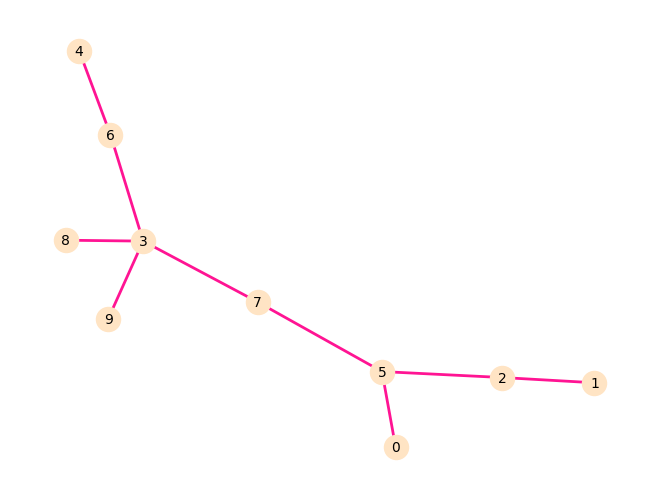

this is A_dict: 
{'1_2': [['-', 't'], ['g', 'g'], ['t', 'a'], ['t', 'c'], ['c', 'c'], ['a', 'a'], ['c', 'c'], ['c', 't'], ['g', 'a'], ['-', 't']], '2_5': [['t', 'c'], ['g', 'g'], ['a', 'a'], ['c', 't'], ['c', 'c'], ['a', 'g'], ['c', 't'], ['-', 'a'], ['t', 'c'], ['a', 'a'], ['t', 't'], ['-', 'a']], '5_7': [['c', 'c'], ['g', 'g'], ['a', 'g'], ['t', 'c'], ['c', 't'], ['g', '-'], ['t', 't'], ['a', 'g'], ['c', 'c'], ['a', 't'], ['t', 't'], ['a', 'g']], '0_5': [['-', 'a'], ['c', 'a'], ['g', 'a'], ['a', 'a'], ['t', 't'], ['-', 'a'], ['c', 'c'], ['-', 'a'], ['-', 'g'], ['g', 'g'], ['t', 'a'], ['a', 'a'], ['c', 'g'], ['a', 'g'], ['t', 't'], ['a', 't']], '3_7': [['-', 'g'], ['c', 'c'], ['g', 'g'], ['g', 't'], ['c', 'c'], ['t', 't'], ['t', 't'], ['g', 'g'], ['-', 'c'], ['c', 'c'], ['-', 'a'], ['t', 't'], ['-', 'c'], ['t', 'c'], ['g', 'g']], '3_6': [['g', 'g'], ['c', '-'], ['g', 'g'], ['t', 't'], ['c', 'c'], ['t', 'g'], ['t', 'a'], ['g', 'g'], ['c', 'c'], ['-', 'a'], ['-', 't'], ['c', 'c'], ['-',

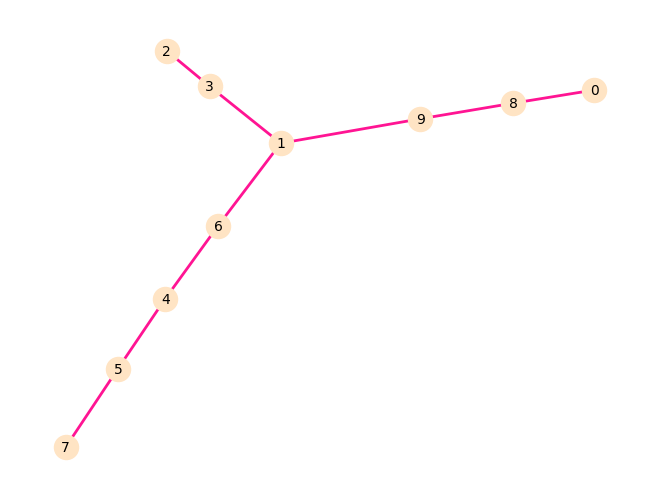

this is A_dict: 
{'2_3': [['t', 't'], ['c', '-'], ['c', 'c'], ['c', 'c'], ['c', 't'], ['c', 'a'], ['c', 'c'], ['g', 'g'], ['a', '-'], ['t', 't'], ['g', '-'], ['g', 'c'], ['t', 't'], ['a', '-'], ['a', '-'], ['g', '-'], ['c', 't'], ['g', 'g'], ['c', '-']], '1_3': [['t', 't'], ['c', 't'], ['c', 'c'], ['t', '-'], ['a', 'a'], ['c', 't'], ['g', 'g'], ['t', '-'], ['c', 'c'], ['t', 'a'], ['t', 'g'], ['g', 'a']], '1_6': [['t', 'c'], ['t', 't'], ['c', 'c'], ['a', 'g'], ['t', '-'], ['g', 'g'], ['c', '-'], ['a', 'a'], ['g', 'g'], ['a', '-']], '1_9': [['-', 'g'], ['t', 't'], ['t', 't'], ['c', 'c'], ['a', '-'], ['t', 't'], ['g', 'g'], ['c', 'c'], ['a', 't'], ['g', 'g'], ['a', 'c']], '4_6': [['c', 'c'], ['-', 'a'], ['t', 'g'], ['c', 't'], ['g', 'g'], ['g', 'a'], ['a', 't'], ['g', 'a']], '8_9': [['g', 'a'], ['t', 't'], ['t', 'g'], ['c', 'c'], ['t', 't'], ['-', 'g'], ['-', 'a'], ['-', 'a'], ['g', 'g'], ['c', 'c'], ['-', 'a'], ['t', 't'], ['-', 'g'], ['g', 'g'], ['-', 't'], ['c', 't']], '4_5': [['c', '-

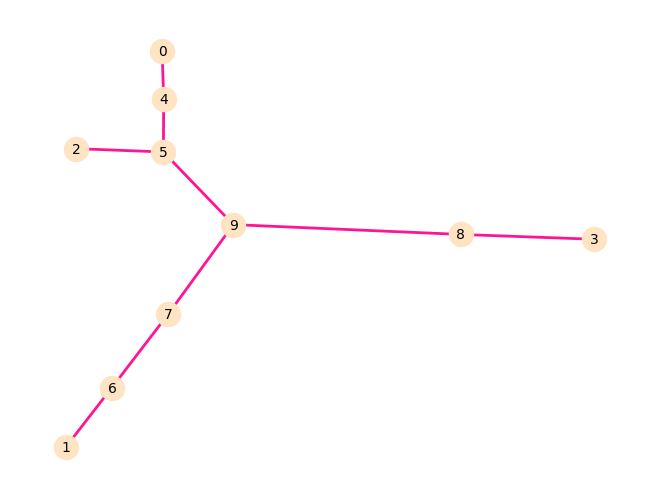

this is A_dict: 
{'2_5': [['a', '-'], ['t', 't'], ['a', '-'], ['t', 'c'], ['g', '-'], ['g', 'g'], ['a', '-'], ['c', '-'], ['a', 'a'], ['g', 'g'], ['a', 'g'], ['c', 'c'], ['c', 'c'], ['t', '-'], ['g', 'g'], ['a', '-'], ['c', '-']], '5_9': [['t', 't'], ['c', '-'], ['g', '-'], ['a', '-'], ['g', 'g'], ['g', 'g'], ['c', 'c'], ['c', 'g'], ['g', 'g']], '4_5': [['-', 'c'], ['-', 'c'], ['t', 't'], ['-', 'g'], ['-', 'a'], ['-', 'c'], ['c', 'c'], ['-', 't'], ['g', 'g'], ['a', 'a'], ['g', 'g'], ['g', 'g'], ['c', 'g'], ['c', 'c'], ['g', 'g'], ['-', 'c']], '8_9': [['t', 't'], ['g', 'g'], ['g', 'g'], ['c', 'c'], ['g', 'a'], ['-', 't'], ['g', 'g']], '7_9': [['t', 't'], ['g', '-'], ['g', 'c'], ['c', 't'], ['g', 'g'], ['g', 'g']], '0_4': [['c', 'g'], ['c', 'a'], ['t', 't'], ['g', 't'], ['a', 'a'], ['c', 't'], ['c', 't'], ['t', 't'], ['g', 'g'], ['-', 't'], ['a', 'a'], ['g', 'g'], ['g', 'g'], ['g', 'g'], ['c', 't'], ['g', 'a'], ['c', '-']], '3_8': [['t', 'c'], ['g', 'a'], ['g', 'g'], ['c', 'c'], ['a', '-

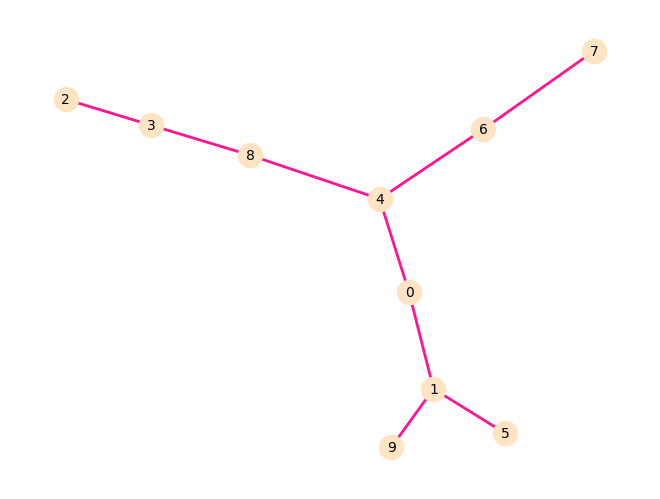

this is A_dict: 
{'2_3': [['c', 't'], ['a', 'a'], ['t', 'g'], ['c', 't'], ['t', 't'], ['a', 'g'], ['a', 'a'], ['a', 't'], ['c', 'c'], ['g', '-'], ['t', 't'], ['g', '-'], ['t', 't'], ['g', 'a'], ['a', 'a'], ['c', 'g'], ['a', 'g'], ['a', 'a'], ['c', 'c']], '3_8': [['t', '-'], ['a', '-'], ['g', '-'], ['t', 'c'], ['t', 'c'], ['g', 'g'], ['a', 'a'], ['t', 't'], ['c', 'c'], ['t', '-'], ['t', 'c'], ['a', '-'], ['a', '-'], ['g', 'g'], ['g', 'a'], ['a', 'a'], ['c', 'c']], '4_8': [['c', 'c'], ['c', 'g'], ['g', 'g'], ['a', 'g'], ['t', 't'], ['c', 't'], ['c', 'c'], ['g', '-'], ['a', '-'], ['a', '-'], ['c', 'c']], '4_6': [['c', 'c'], ['g', '-'], ['g', '-'], ['g', '-'], ['t', 't'], ['t', 'g'], ['c', 'c'], ['c', 't']], '0_4': [['-', 'a'], ['c', 't'], ['g', 'g'], ['-', 't'], ['g', 'g'], ['-', 'c'], ['g', 'a'], ['t', 't'], ['t', 't'], ['c', 'c'], ['-', 'g'], ['c', 'c'], ['-', 'a']], '6_7': [['c', 'c'], ['t', '-'], ['g', 'g'], ['c', 'c'], ['-', 'a'], ['t', 't']], '0_1': [['a', 'g'], ['t', 't'], ['g', 'g

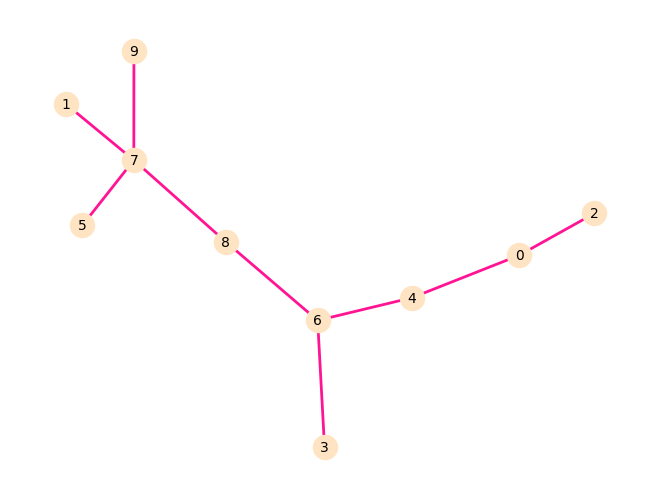

this is A_dict: 
{'0_4': [['t', 't'], ['-', 'g'], ['t', 'g'], ['a', 'a'], ['g', 'a'], ['a', 'g'], ['c', 't'], ['g', 'g']], '0_2': [['t', 'a'], ['t', 'c'], ['a', 't'], ['g', 'g'], ['a', 't'], ['c', 't'], ['g', 'a']], '4_6': [['-', 'g'], ['-', 'c'], ['t', 't'], ['g', 'a'], ['g', 'a'], ['a', 'c'], ['a', 'a'], ['g', 'g'], ['t', 't'], ['g', 'g'], ['-', 'c'], ['-', 't']], '3_6': [['g', 'c'], ['c', 'c'], ['t', 'c'], ['a', 'c'], ['a', 'g'], ['c', 'c'], ['a', 'c'], ['g', 'a'], ['t', 't'], ['g', 'a'], ['c', 'c'], ['t', 't'], ['-', 'c']], '6_8': [['-', 'a'], ['g', 'a'], ['c', 't'], ['-', 'g'], ['t', 't'], ['a', 'a'], ['a', 'g'], ['c', 't'], ['a', 'a'], ['g', 'a'], ['t', 'a'], ['g', 'g'], ['c', '-'], ['t', 't']], '7_8': [['-', 'a'], ['a', 'a'], ['a', 'a'], ['t', 't'], ['g', 'a'], ['t', 'c'], ['a', 'g'], ['g', 'g'], ['t', 'c'], ['a', 'g'], ['-', 't'], ['-', 'c'], ['a', 'a'], ['a', 'c'], ['g', 'a'], ['t', 't']], '1_7': [['a', 'g'], ['-', 'c'], ['a', 'g'], ['a', 'a'], ['t', 't'], ['a', 'a'], ['c', 'a

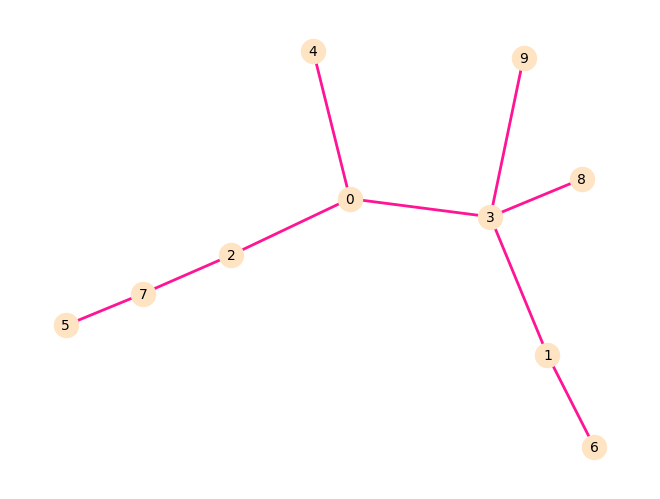

this is A_dict: 
{'1_6': [['g', 't'], ['t', 't'], ['a', 'a'], ['-', 'g'], ['a', 'a'], ['-', 'g'], ['c', 't'], ['t', 't'], ['c', 'c'], ['a', 'a'], ['t', 't'], ['g', '-'], ['g', '-'], ['a', '-'], ['g', '-'], ['a', 'a'], ['g', '-'], ['g', 'g'], ['a', 't'], ['g', 'g']], '1_3': [['t', '-'], ['t', 't'], ['a', '-'], ['g', 'g'], ['a', 'a'], ['g', '-'], ['t', 't'], ['t', 't'], ['c', '-'], ['a', '-'], ['t', 't'], ['a', 'g'], ['g', 'a'], ['t', 't'], ['g', '-']], '3_9': [['t', 'g'], ['g', 'g'], ['a', 'g'], ['t', 't'], ['t', 'c'], ['t', 'c'], ['-', 'g'], ['g', 'g'], ['-', 'c'], ['a', 'a'], ['t', 't']], '0_3': [['t', 'c'], ['g', '-'], ['a', '-'], ['t', 't'], ['t', 't'], ['t', 't'], ['g', 'g'], ['a', 'g'], ['-', 'c'], ['t', 't'], ['-', 'a']], '3_8': [['t', '-'], ['g', 'g'], ['a', '-'], ['t', '-'], ['t', 't'], ['t', 'c'], ['g', 'a'], ['a', 'g'], ['t', '-']], '0_4': [['c', 't'], ['t', 't'], ['t', 'c'], ['t', 't'], ['g', 'a'], ['-', 'c'], ['g', 'a'], ['c', 'c'], ['t', 'c'], ['a', 'a'], ['-', 't']], '0_2

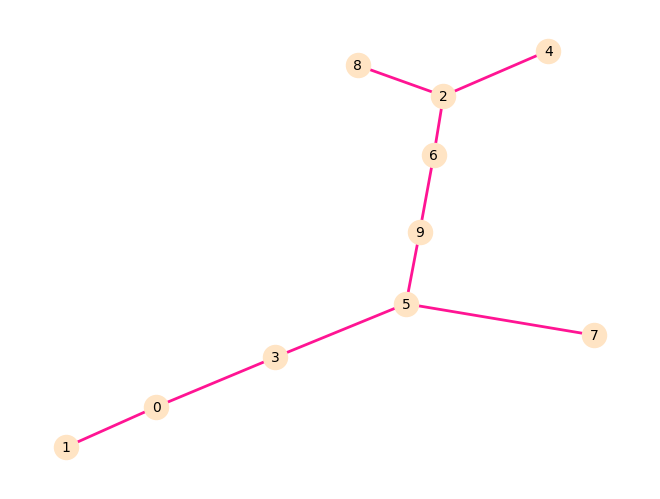

this is A_dict: 
{'2_8': [['a', 'a'], ['a', 't'], ['a', 'a'], ['t', 't'], ['g', '-'], ['g', 'c'], ['g', 'g'], ['a', 'a'], ['c', '-'], ['t', '-'], ['t', 't'], ['g', '-'], ['a', 'a'], ['g', 'g'], ['a', 'g'], ['t', '-'], ['g', 'g'], ['t', 'c']], '2_4': [['-', 'c'], ['a', 'a'], ['t', 'c'], ['a', 'a'], ['t', 't'], ['c', 'c'], ['g', 'a'], ['a', 'g'], ['t', '-'], ['a', 'a'], ['g', 'g'], ['g', 'g'], ['g', 't'], ['c', 'c']], '2_6': [['a', '-'], ['t', 'c'], ['a', '-'], ['t', 't'], ['c', '-'], ['g', 'a'], ['a', 'a'], ['t', 't'], ['a', '-'], ['g', 'g'], ['g', 'g'], ['g', 'g'], ['c', '-']], '6_9': [['c', 'c'], ['t', 'c'], ['a', 'a'], ['a', 'a'], ['t', '-'], ['g', '-'], ['g', '-'], ['g', 'g']], '5_9': [['c', 'c'], ['c', 'g'], ['a', 'a'], ['-', 'c'], ['a', 'c'], ['g', 't']], '5_7': [['c', '-'], ['g', 'a'], ['a', 'a'], ['c', 'g'], ['c', 'c'], ['t', 't']], '3_5': [['-', 'g'], ['c', 'c'], ['g', 'a'], ['-', 'c'], ['a', 't'], ['c', 'c'], ['c', 'c'], ['t', 't'], ['-', 'c']], '0_3': [['g', 'g'], ['c', 't'],

In [10]:
costs_new_gradual=[]
costs_new_one_by_one=[]
costs_old=[]

for random_pile in random_sequences_collection:
    cost=new_assembly(random_pile,score_matrix,gap_cost)[4]
    costs_new_gradual.append(cost)
for random_pile in random_sequences_collection:
    cost=new_sp_approxi_combi(random_pile,score_matrix,gap_cost)[0]
    costs_new_one_by_one.append(cost)
for random_pile in random_sequences_collection:
    cost=sp_approx(random_pile,score_matrix,gap_cost)[0]
    costs_old.append(cost)
print(costs_new_gradual)
print(costs_new_one_by_one)
print(costs_old)
costs_new_gradual=np.array(costs_new_gradual)
costs_new_one_by_one=np.array(costs_new_one_by_one)
costs_old=np.array(costs_old)
differences_obo_old=np.subtract(costs_new_one_by_one,costs_old)
differences_gradual_old=np.subtract(costs_new_gradual,costs_old)
differences_gradual_obo=np.subtract(costs_new_gradual,costs_new_one_by_one)
print(differences_obo_old, differences_gradual_obo,differences_gradual_obo)

In [11]:
count_diff_obo_old=np.count_nonzero(differences_obo_old<0) #times one by one was better than old
count_diff_gradual_old=np.count_nonzero(differences_gradual_old<0) #times gradual was better than old
count_diff_gradual_obo=np.count_nonzero(differences_gradual_obo<0) #times one by one was better than gradual
print(count_diff_obo_old,count_diff_gradual_old,count_diff_obo_old)

0 1 0
